<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/3_2_Merging_and_Pandas_Profiling_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

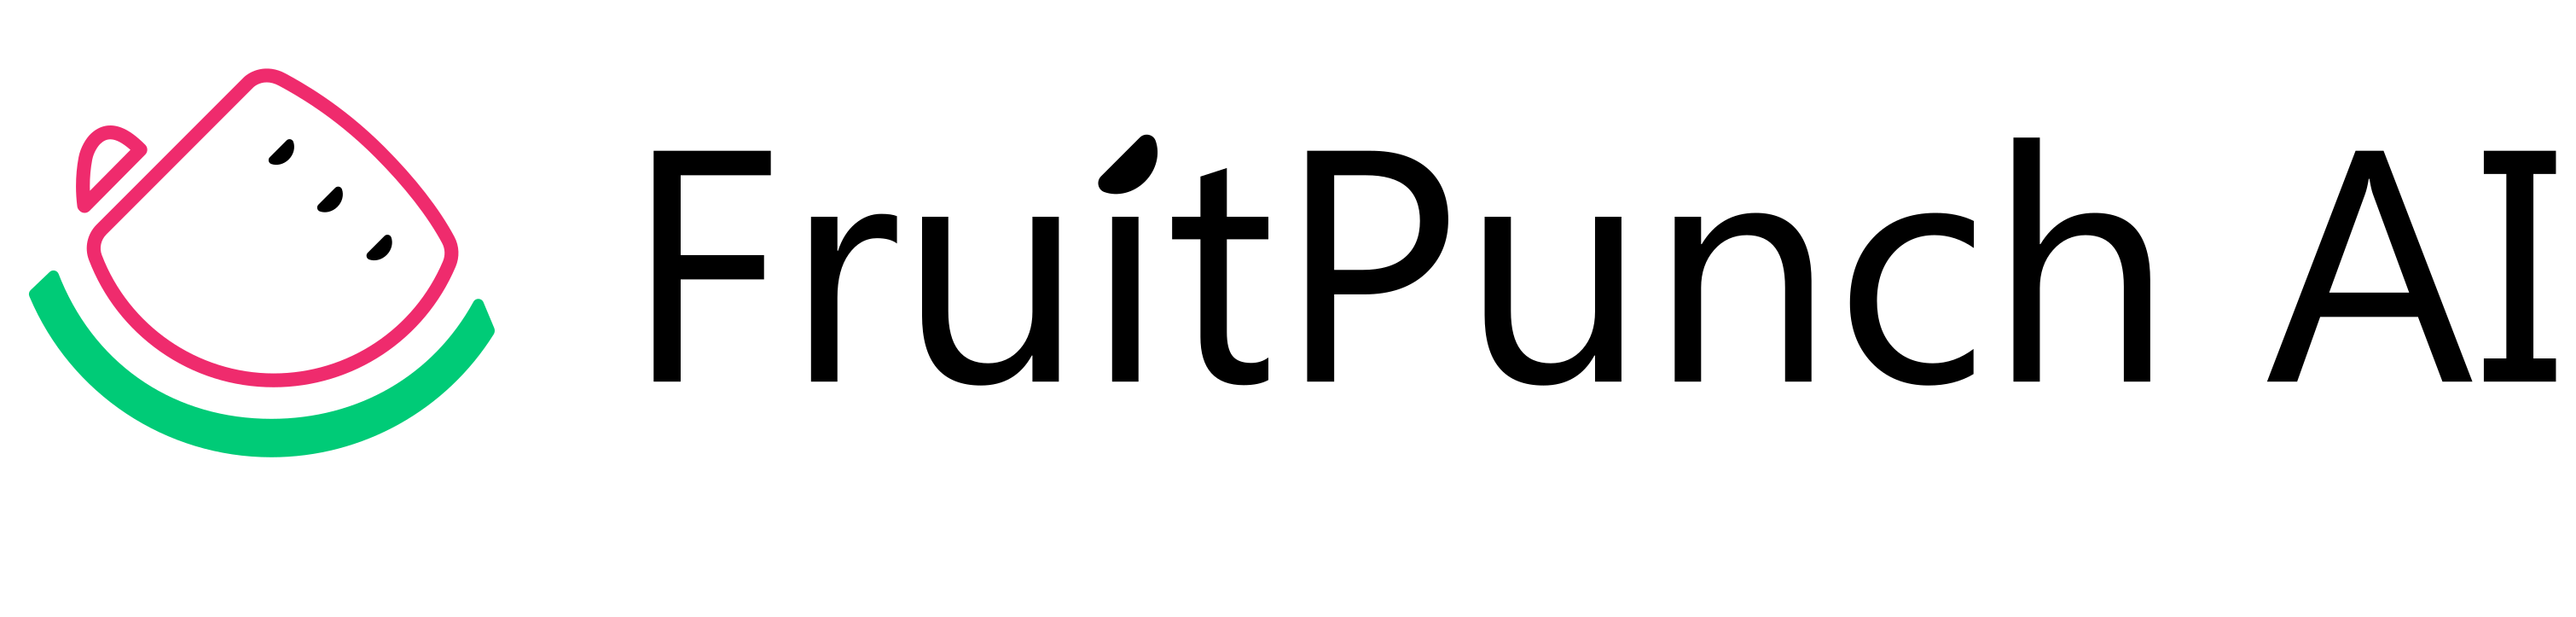

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling -q
!jupyter nbextension enable --py widgetsnbextension -q
!pip install MarkupSafe==2.0.1 -q

#Restart runtime after running this cell
#Ignore the errors, everything in the notebook should work fine

     |████████████████████████████████| 325 kB 7.4 MB/s 
     |████████████████████████████████| 102 kB 48.4 MB/s 
     |████████████████████████████████| 9.9 MB 35.5 MB/s 
     |████████████████████████████████| 690 kB 45.7 MB/s 
     |████████████████████████████████| 62 kB 801 kB/s 
     |████████████████████████████████| 4.7 MB 34.4 MB/s 
     |████████████████████████████████| 296 kB 21.5 MB/s 
usage: jupyter-nbextension [-h] [--debug] [--show-config] [--show-config-json]
                           [--user] [--system] [--sys-prefix] [--py]
                           [--python] [--section EnableNBExtensionApp.section]
                           [extra_args [extra_args ...]]
jupyter-nbextension: error: argument -q: expected one argument


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas import datetime
import seaborn as sns

###Merging Datasets

For this notebook we will do some Dataset merging. We will do this using the Pandas Library. You can use the [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to help you remember the commands. The data we practice with comes from Mental Health surveys per country. Go ahead and download the Data.

In [2]:
#download the data

!gdown --id 1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8

#https://drive.google.com/file/d/1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8
To: /content/Mental Health Dataset.zip
100% 1.66M/1.66M [00:00<00:00, 140MB/s]


In [3]:
!unzip "/content/Mental Health Dataset.zip" -d "/content/Mental_Health/"

Archive:  /content/Mental Health Dataset.zip
  inflating: /content/Mental_Health/mental-and-substance-use-as-share-of-disease.csv  
  inflating: /content/Mental_Health/prevalence-by-mental-and-substance-use-disorder.csv  
  inflating: /content/Mental_Health/prevalence-of-depression-males-vs-females.csv  
  inflating: /content/Mental_Health/share-with-depression.csv  
  inflating: /content/Mental_Health/share-with-mental-and-substance-disorders.csv  
  inflating: /content/Mental_Health/share-with-mental-or-substance-disorders-by-sex.csv  


####Assignment 1:

A) load the first two datasets
- mental-and-substance-use-as-share-of-disease.csv
- prevalence-by-mental-and-substance-use-disorder.csv  

B) Inspect the data and check for similarities

C) Use Pandas to merge the 2 datasets into 1 (Your merged dataset should have the same number of rows)

D) Do the same with:
- share-with-depression.csv
- share-with-mental-and-substance-disorders.csv

&

- prevalence-of-depression-males-vs-females.csv  
- share-with-mental-or-substance-disorders-by-sex.csv
(Before you merge this last one, check the variable "Continent". It has a lot of NaN values so you can delete this variable.)

E) The last merge from the previous task also has a lot of NaN values. To make the data more usable we use .dropna() to drop all the rows with NaN's

F) Finally merge all your previously merged datasets together so you have all info from the 6 datasets in 1 - Your final dataset should have 6840 rows × 17 columns


In [38]:
#A)load the first two datasets
#mental-and-substance-use-as-share-of-disease.csv
#prevalence-by-mental-and-substance-use-disorder.csv

df1 = pd.read_csv('/content/Mental_Health/mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('/content/Mental_Health/prevalence-by-mental-and-substance-use-disorder.csv')
#D)
df3 = pd.read_csv('/content/Mental_Health/share-with-depression.csv')
df4 = pd.read_csv('/content/Mental_Health/share-with-mental-and-substance-disorders.csv')

df5 = pd.read_csv('/content/Mental_Health/prevalence-of-depression-males-vs-females.csv')
df6 = pd.read_csv('/content/Mental_Health/share-with-mental-or-substance-disorders-by-sex.csv')

#B) Inspect the data and check for similarities
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [63]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 6   

In [40]:
#C) Use Pandas to merge the 2 datasets into 1 (Your merged dataset should have the same number of rows)
df_merge_12 = pd.merge(df1, df2, how='left')
df_merge_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

In [ ]:
#D) Do the same with:
# share-with-depression.csv
# share-with-mental-and-substance-disorders.csv
# &
# prevalence-of-depression-males-vs-females.csv
# share-with-mental-or-substance-disorders-by-sex.csv (Before you merge this last one, check the variable "Continent". It has a lot of NaN values so you can delete this variable.)



In [41]:
#df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 4 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           6780 non-null   object 
 1   Code                                                                             6090 non-null   object 
 2   Year                                                                             6780 non-null   int64  
 3   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  6780 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.0+ KB


In [42]:
#df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 4 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Entity                                                                       6780 non-null   object 
 1   Code                                                                         6090 non-null   object 
 2   Year                                                                         6780 non-null   int64  
 3   Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)  6780 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.0+ KB


In [43]:
df_merge_34 = pd.merge(df3, df4, how='left')
df_merge_34.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6780 entries, 0 to 6779
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           6780 non-null   object 
 1   Code                                                                             6090 non-null   object 
 2   Year                                                                             6780 non-null   int64  
 3   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  6780 non-null   float64
 4   Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)      6780 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 317.8+ KB


In [44]:
#df5
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56395 entries, 0 to 56394
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             56395 non-null  object 
 1   Code                                                                               54079 non-null  object 
 2   Year                                                                               56395 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 5   Population (historical estimates)                                                  55656 non-null  floa

In [45]:
#df6
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56629 entries, 0 to 56628
Data columns (total 7 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           56629 non-null  object 
 1   Code                                                                                             54079 non-null  object 
 2   Year                                                                                             56629 non-null  int64  
 3   Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)    6468 non-null   float64
 4   Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)  6468 non-null   float64
 5   Popul

In [59]:
#Before you merge this last one, check the variable "Continent". It has a lot of NaN values so you can delete this variable.)
df6_new = df6.drop(columns='Continent')
df5_new = df5.drop(columns='Continent')
df5_new = df5_new.drop(columns='Population (historical estimates)')
#print(df6_new.head())
df_merge_56 = pd.merge(df5_new, df6_new, how='outer', on=['Entity', 'Code', 'Year'])
df_merge_56.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57207 entries, 0 to 57206
Data columns (total 8 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           57207 non-null  object 
 1   Code                                                                                             54079 non-null  object 
 2   Year                                                                                             57207 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)                  6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)                6840 non-null   float64
 5   Preva

In [60]:
# E) The last merge from the previous task also has a lot of NaN values. To make the data more usable we use .dropna() to drop all the rows with NaN's
df_merge_56_dropna = df_merge_56.dropna()
df_merge_56_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 1 to 56162
Data columns (total 8 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           5488 non-null   object 
 1   Code                                                                                             5488 non-null   object 
 2   Year                                                                                             5488 non-null   int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)                  5488 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)                5488 non-null   float64
 5   Preval

In [61]:
#F) Finally merge all your previously merged datasets together so you have all info from the 6 datasets in 1 - Your final dataset should have 6840 rows × 17 columns
df_merge_1234 = pd.merge(df_merge_12, df4, how='outer', on=['Entity', 'Code', 'Year'])
#df_merge_1234.info()
df_merge_all = pd.merge(df_merge_1234, df_merge_56_dropna, how='outer', on=['Entity', 'Code', 'Year'])
df_merge_all.info()
#if I remove the population estimates, this should be fine

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 17 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

Assignment 2:

A) Create a subset for a country of your choice and Plot a line for all variables except population.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 5430 to 5459
Data columns (total 17 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           30 non-null     object 
 1   Code                                                                                             30 non-null     object 
 2   Year                                                                                             30 non-null     int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  30 non-null     float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         30 non-null     float64
 5   Preva

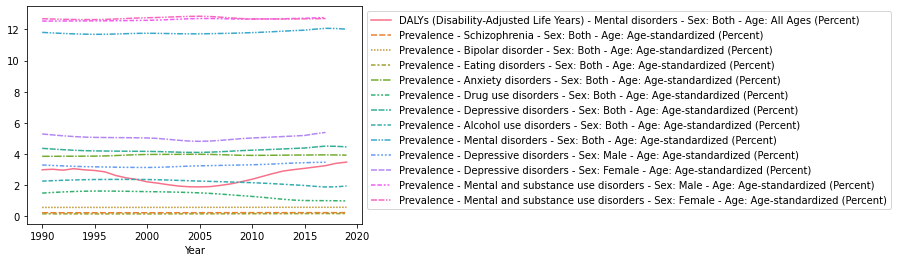

In [82]:
#A)
df_merge_all.Entity.unique()
df_SA = df_merge_all[df_merge_all.Entity == 'South Africa']
df_SA.info()
df_SA.index = df_SA['Year']
df_SA_no_pop = df_SA.drop(columns=['Population (historical estimates)', 'Year'])
sa_plot = sns.lineplot(data=df_SA_no_pop)
sns.move_legend(sa_plot, "upper left", bbox_to_anchor=(1, 1))

###Pandas Profiling

pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding. 

Down here we run an axample for a subset of the data.

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Netherlands)

###Assignment 3

A) Make a profile report for the country that you choose in the previous assignment

B) Have a look at the type of alerts in the report. Write down what warnings you get, what they mean and if they are actually a problem for you.

C) Go to variables and click Toggle details for a variable of your choice to see all the variable statistics.

D) Continue to Interactions. In the left panel you select 'Year'. Now compare the graph with the lineplot you made in the previous assignment

E) Check the correlations matrix. Note down all variables that have a strong correlation (>0.7) with Depressive disorders